In [2]:
import zipfile
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults
from statsmodels.tsa.stattools import acf
import itertools
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
from functools import reduce

data_file = 'cpc.num_patents.by.year.txt'

file1 = 'patent.counts.by.CPC.by.grantyear.tsv'
file2 = 'patent.application.counts.by.CPC.by.grantyear.tsv'
file3 = 'patent.counts.owned.by.Private.Sector.by.CPC.by.grantyear.tsv'
file4 = 'patent.counts.owned.by.US.Federal.Government.by.CPC.by.grantyear.tsv'
file5 = 'patent.counts.owned.by.Universities.by.CPC.by.grantyear.tsv'
file6 = 'patent.counts.owned.by.Lone.Inventors.by.CPC.by.grantyear.tsv'
file7 = 'patent.counts.owned.by.Unique.Number.of.Assignees.by.CPC.by.grantyear.tsv'
file8 = 'patent.counts.supported.by.US.Federal.Government.by.CPC.by.grantyear.tsv'
file9 = 'cites.into.CPC.by.grantyear.tsv'
file10 = 'cites.from.CPC.by.grantyear.tsv'
file11 = 'cites.non-patent.literature.from.CPC.by.grantyear.tsv'

pat_counts = pd.read_csv(file1, sep="\t").set_index(['CPC','year_'])
app_counts = pd.read_csv(file2, sep="\t").set_index(['CPC','year_'])
priv_counts = pd.read_csv(file3, sep="\t").set_index(['CPC','year_'])
gov_counts = pd.read_csv(file4, sep="\t").set_index(['CPC','year_'])
univ_counts = pd.read_csv(file5, sep="\t").set_index(['CPC','year_'])
invent_counts = pd.read_csv(file6, sep="\t").set_index(['CPC','year_'])
assign_counts = pd.read_csv(file7, sep="\t").set_index(['CPC','year_'])
govsup_counts = pd.read_csv(file8, sep="\t").set_index(['CPC','year_'])
citesinto_counts = pd.read_csv(file9, sep="\t").set_index(['CPC','year_'])
citesfrom_counts = pd.read_csv(file10, sep="\t").set_index(['CPC','year_'])
citeslit_counts = pd.read_csv(file11, sep="\t").set_index(['CPC','year_'])

data_list = [pat_counts, app_counts, priv_counts, gov_counts, univ_counts, invent_counts, assign_counts, govsup_counts,
             citesinto_counts, citesfrom_counts, citeslit_counts]

#Putting in the same df
data_all = reduce(lambda x, y: pd.merge(x, y, how='outer', left_index=True, right_index=True), data_list)
data_all.columns = ['patents', 'applications', 'private', 'government', 'university', 'inventor', 
                    'assignee', 'gov_support', 'cites_into', 'cites_from', 'cites_literature']

data_all = data_all.reset_index()



In [13]:
data_all = data_all.fillna(0)

In [14]:
data_all[['year_', 'patents']]
data_all

,CPC,year_,patents,applications,private,government,university,inventor,assignee,gov_support,cites_into,cites_from,cites_literature
0,A01B 1,2000,10.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,43.0,206.0,5.0
1,A01B 1,2001,5.0,1.0,2.0,0.0,0.0,3.0,2.0,5.0,31.0,62.0,0.0
2,A01B 1,2002,10.0,9.0,4.0,0.0,0.0,6.0,4.0,10.0,27.0,157.0,0.0
3,A01B 1,2003,4.0,9.0,3.0,0.0,0.0,1.0,3.0,4.0,44.0,78.0,0.0
4,A01B 1,2004,1.0,7.0,0.0,0.0,0.0,1.0,0.0,1.0,38.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4201075,Y10T83/7697,2016,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,11.0,0.0
4201076,Y10T83/7755,2016,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,11.0,0.0
4201077,Y10T83/9319,2018,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,38.0,0.0
4201078,Y10T83/9319,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [10]:
data_all['patents'].describe()

count    4.201080e+06
mean     6.812662e+00
std      2.909473e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      5.000000e+00
max      6.248000e+03
Name: patents, dtype: float64

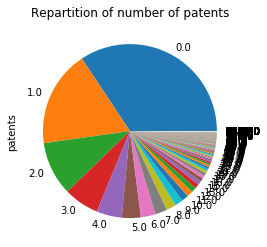

In [11]:
pie = data_all['patents'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
pie.plot.pie(title = 'Repartition of number of patents')

NameError: name 'x' is not defined

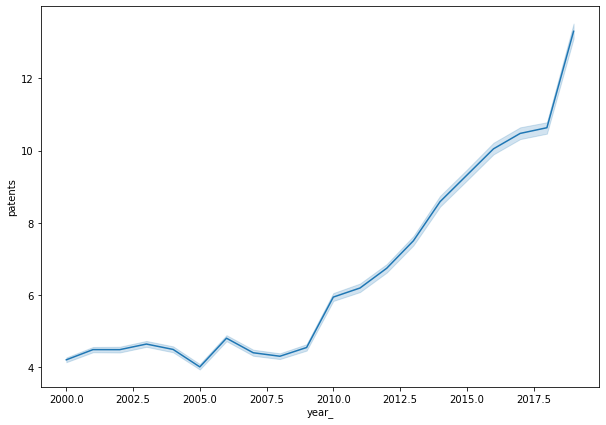

In [12]:
plt.figure(figsize = (10,7))
sns.lineplot(data_all['year_'], data_all['patents'])

plt.plot(np.exp(x), 'r-')

plt.legend()
plt.title('Total Patents per Year')
plt.xlabel('Year')
plt.ylabel('patents')
plt.xticks(range(2000,2019,2));


#data[['patents', 'year_']].hist(bins = 10, color='black')

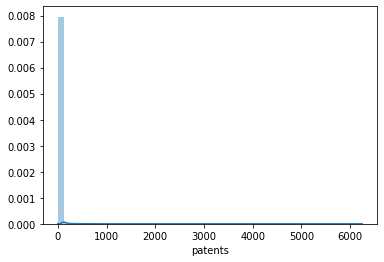

In [13]:
sns.distplot(data_all["patents"])

In [14]:
#sumByYear = data_all.groupby('Year').sum()
#
#plt.figure(figsize=(10,7))
#sns.lineplot(sumByYear.index, sumByYear['Num_of_Patents']) 
# 
#c

In [15]:
#pie = data['Num_of_Patents'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
#pie.plot.pie(title = 'Repartition of number of patents')

In [20]:
Ytrain = data_all['patents']
Xtrain = data_all[['year_','applications', 'private', 'government', 'university', 'inventor', 'assignee', 'gov_support', 'cites_into', 'cites_from', 'cites_literature']]
np.shape(Xtrain)

(4201080, 11)

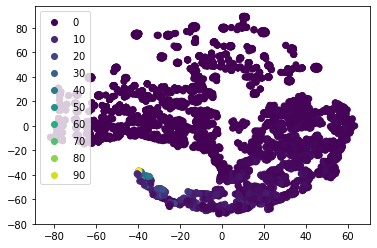

In [24]:

#####TSNE
#https://www.datacamp.com/community/tutorials/introduction-t-sne
#https://stats.stackexchange.com/questions/331745/how-to-interpret-t-sne-plot

#Let's visualize the first 1000 inputs of our dataset
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(Xtrain[:5000])

X,Y=[],[]
for i in range(len(X_embedded)) :
    X.append(X_embedded[i][0])
    Y.append(X_embedded[i][1])

#We only print the 10.000 first inputs because it lasts too long to do so on the whole dataset.
scatter=plt.scatter(X, Y, c=Ytrain[:5000])
plt.legend(*scatter.legend_elements())
plt.show()

In [28]:
classes = np.unique(Ytrain)
nbclasses = len(classes)

1274

In [32]:
#https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
from sklearn.decomposition import PCA
pca_ = PCA(n_components=10)
principalComponents = pca_.fit_transform(Xtrain)

In [6]:
#principal_breast_Df = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2'])
#
#
#plt.figure()
#plt.figure(figsize=(10,10))
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=14)
#plt.xlabel('Principal Component - 1',fontsize=20)
#plt.ylabel('Principal Component - 2',fontsize=20)
#plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
#targets = ['Benign', 'Malignant']
#colors = ['r', 'g']
#for target, color in zip(targets,colors):
#    indicesToKeep = data_all['patents'] == target
#    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
#               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
#
#plt.legend(targets,prop={'size': 15})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6bd07a810>,
      dtype=object)

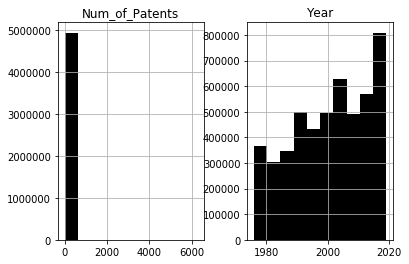

In [44]:
data[['Num_of_Patents', 'Year']].hist(bins = 10, color='black')

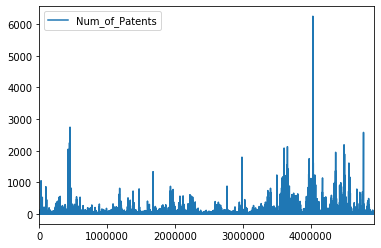

In [19]:
#### Trends by Year
# count the number of patents each year and 
data['Num_of_Patents'].value_counts(ascending=True)

#selected = data.loc[('16/12/2004 20:16:00' < fcdata.index) & (fcdata.index < '16/12/2004 20:25:00'),'Feed rate']
selected = data[['Num_of_Patents']]
selected
selected.plot()
plt.show()

In [7]:
#data['Num_of_Patents'].value_counts(normalize = False, sort = data['Year'], ascending=False, bins = None, dropna=True)


In [5]:
input_cpc = 'C02F 1/00; C02F 3/00; B01J 20/226; B01J 20/00 ; B01J 20/22; B01J 20/223;  B01J 20/28033; C02F 1/281 ; C02F 1/285 ;C02F 2101/20  '

In [8]:
#pie1 = data['CPC_Patent_Class'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
#pie1.plot.pie(title = 'Repartition of CPCs')